1. Za pomoci níže uvedeného kódu naimportujte knihovny a do proměnné url získejte adresu datasetu

```python
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
```

2. Načtete data z proměnné url do pandas dataframe, proměnnou pojmenujte ```df```.
3. Upravte datový typ sloupce ```DATE``` na ```datetime```.
4. Přidejte do ```df``` sloupec ```YEAR``` a ```MONTH```


In [32]:
# Buňka pro body 1-4
# Buňka pro body 1-5
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

5. Filtrujte `df` na `NAME == 'RUZYNE'`.
6. Agregujte** sloupec `PRCP` dle `YEAR` s agregační funkcí `SUM`.
7. Přidejte sloupec `AVG`, který bude obsahovat průměrnou hodnotu z agregovaného sloupce `PRCP`.
8. Přidejte sloupec `COLOR` s hodnotami: `RED`, pokud `PRCP < AVG`, jinak `CYAN`.



In [33]:
# Buňka pro body 5-8
df = df.loc[df['NAME']=='RUZYNE']
df = df.groupby(by='YEAR',as_index=False)['PRCP'].sum()
prumerna_hodnota = df['PRCP'].mean()
df['AVG'] = prumerna_hodnota

df.loc[df['PRCP']<df['AVG'],'COLOR'] = 'RED'
df.loc[df['PRCP']>=df['AVG'],'COLOR'] = 'CYAN'

df.head()


YEAR   PRCP         AVG COLOR
0  2000  353.9  546.538095   RED
1  2001  499.3  546.538095   RED
2  2002  605.0  546.538095  CYAN
3  2003  294.8  546.538095   RED
4  2004  472.0  546.538095   RED

9. Vytvořte si `fig, ax = plt.subplots()`.
10. Za pomoci metody `.bar()` **vytvořte** sloupcový graf se sumou `PRCP` dle `YEAR` (tj. `YEAR` bude na ose X), do atributu `color` dejte sloupec `COLOR`.
11. Za pomoci metody `.plot()` **přidejte** osu zobrazující hodnotu ze sloupce `AVG`.
12. Za pomoci metody `.set_title()` **přidejte nadpis** "Vývoj ročních srážek v lokalitě RUZYNE".
13. Uložte `fig` do `.png`.


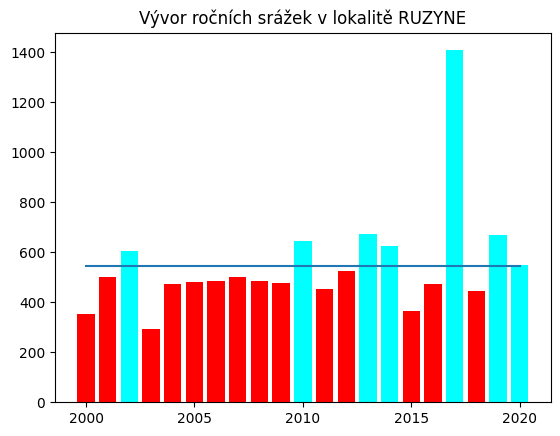

In [34]:
# Buňka pro body 9-13
from matplotlib import pyplot as plt

fig,ax = plt.subplots()
ax.bar(df['YEAR'],df['PRCP'],color = df['COLOR'])
ax.plot(df['YEAR'],df['AVG'])
ax.set_title('Vývor ročních srážek v lokalitě RUZYNE')

plt.savefig('rocni_srazky.png')

Bonus 1:
Vytvořte iteraci pro výše uvedené, tj. na konci by měly být .png soubory pro každou jednu lokalitu


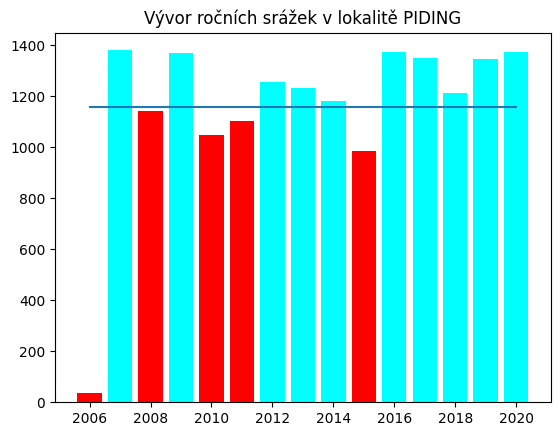

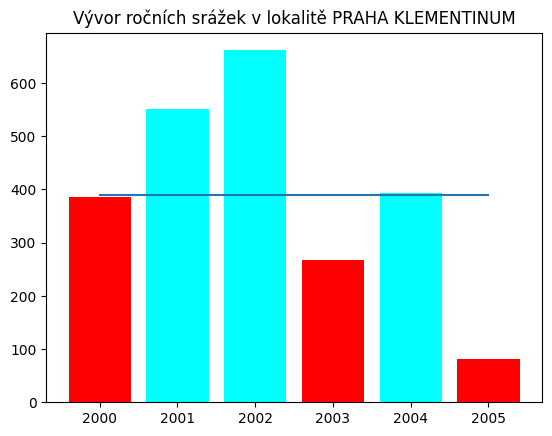

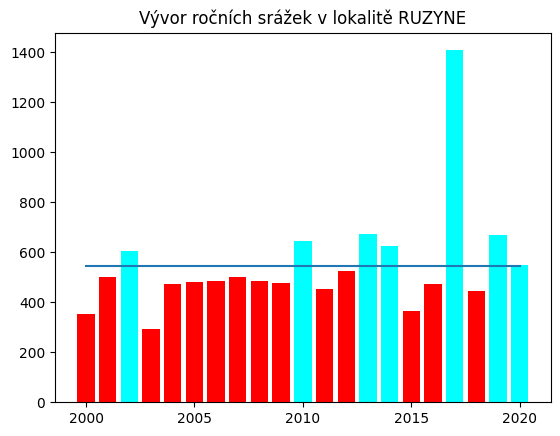

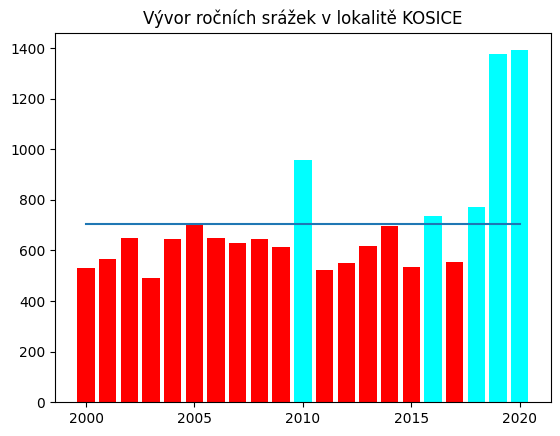

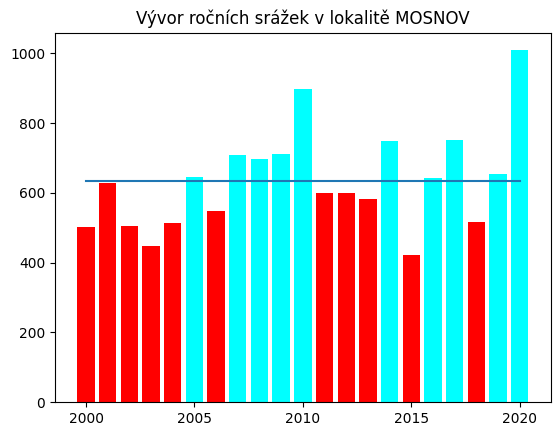

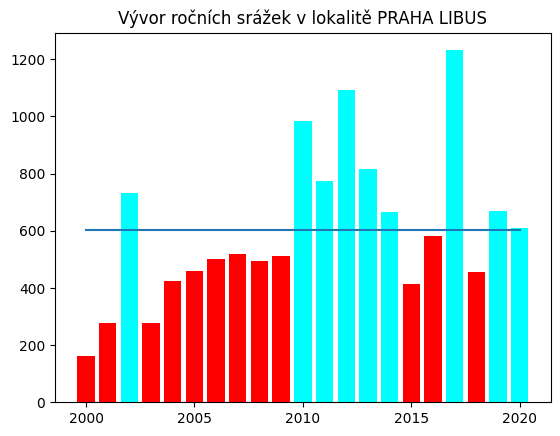

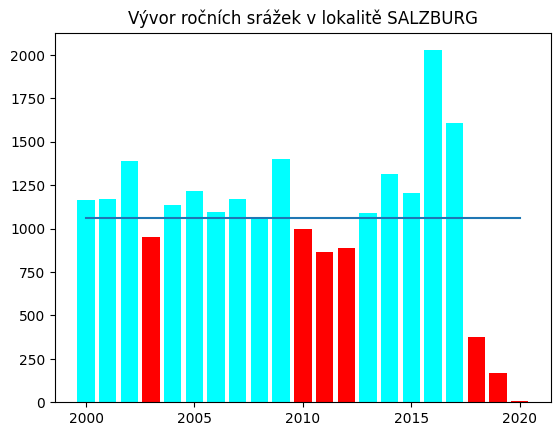

In [39]:
# Buňka pro body 1-4
# Buňka pro body 1-5
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

lokality = df['NAME'].unique().tolist()

for l in lokality:
    df1 = df.copy()
    df1 = df1.loc[df1['NAME']==l]
    df1 = df1.groupby(by='YEAR',as_index=False)['PRCP'].sum()
    prumerna_hodnota = df1['PRCP'].mean()
    df1['AVG'] = prumerna_hodnota

    df1.loc[df1['PRCP']<df1['AVG'],'COLOR'] = 'RED'
    df1.loc[df1['PRCP']>=df1['AVG'],'COLOR'] = 'CYAN'

    fig,ax = plt.subplots()
    ax.bar(df1['YEAR'],df1['PRCP'],color = df1['COLOR'])
    ax.plot(df1['YEAR'],df1['AVG'])
    ax.set_title(f'Vývor ročních srážek v lokalitě {l}')

    plt.savefig(f'rocni_srazky_{l}.png')
    